In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

import time

%matplotlib inline

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving solar.csv to solar.csv


In [6]:
import pandas as pd
import numpy as np
#load .csv file
df = pd.read_csv("solar.csv")
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [7]:
df.shape

(4213, 21)

In [8]:
df.tail(50)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4163,11.29,52,1029.2,0.0,0.0,100.0,100,100,0,420.97,...,175.10,29.96,175.87,24.93,175.03,23.76,25.823425,66.224601,197.85652,699.165410
4164,11.71,51,1029.6,0.0,0.0,29.4,98,6,0,385.37,...,175.67,27.78,176.28,23.80,176.53,23.04,36.978487,70.978463,211.71054,481.441600
4165,11.15,53,1028.9,0.0,0.0,4.5,15,0,0,339.09,...,177.23,27.02,177.71,22.35,177.23,21.96,49.503665,77.722394,223.74308,104.993270
4166,4.02,73,1029.5,0.0,0.0,100.0,100,100,0,0.00,...,169.70,42.70,165.85,29.53,170.88,42.84,82.009542,100.096400,112.18995,0.310417
4167,3.64,77,1029.3,0.0,0.0,100.0,74,100,0,0.00,...,169.51,44.36,164.95,31.07,169.99,44.28,71.765978,92.348306,118.93670,173.125170
4168,3.59,79,1029.7,0.0,0.0,100.0,58,100,0,3.56,...,167.91,45.59,164.43,31.91,168.94,45.36,58.234701,83.109320,128.99023,1088.204800
4169,5.43,69,1029.6,0.0,0.0,4.8,16,0,0,116.59,...,168.44,44.53,165.96,33.39,168.81,42.84,44.956366,75.106206,140.34070,1546.084400
4170,7.04,60,1028.6,0.0,0.0,8.7,29,4,0,263.44,...,167.14,44.53,165.96,34.60,167.99,45.00,32.521401,68.899840,153.24399,540.678610
4171,8.64,53,1027.3,0.0,0.0,28.2,94,0,0,371.13,...,166.53,45.41,165.30,36.59,166.92,43.20,22.643677,65.094769,167.59575,398.034720
4172,9.39,48,1026.4,0.0,0.0,100.0,100,100,0,297.26,...,167.47,42.53,166.79,34.17,168.45,42.12,19.583318,64.139093,182.76749,271.570500


In [10]:
print(df.generated_power_kw)

0        454.100950
1       1411.999400
2       2214.849300
3       2527.609200
4       2640.203400
           ...     
4208     173.410560
4209     403.792220
4210     158.367780
4211     126.953060
4212      20.055031
Name: generated_power_kw, Length: 4213, dtype: float64


In [11]:
print(df.temperature_2_m_above_gnd)

0       2.17
1       2.31
2       3.65
3       5.82
4       7.73
        ... 
4208    8.69
4209    7.57
4210    7.27
4211    8.25
4212    8.00
Name: temperature_2_m_above_gnd, Length: 4213, dtype: float64


In [15]:
df.index[1:][5]

6

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [21]:
# 1. Basic Statistical Analysis
stats_summary = df.describe()

In [22]:
# 2. Correlation Matrix
correlation_matrix = df.corr()

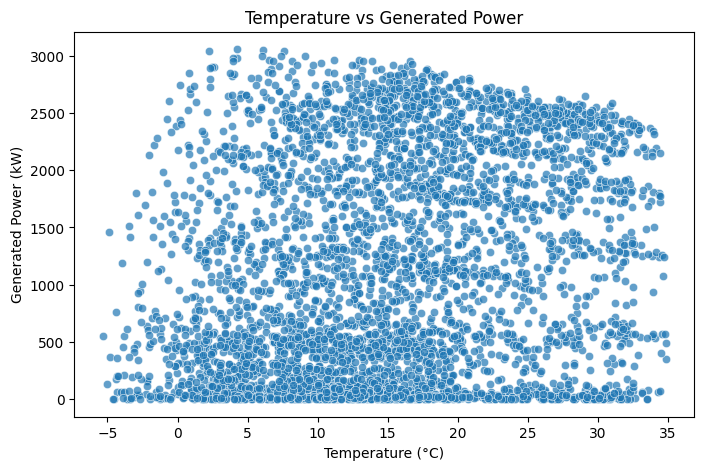

In [23]:
# 3. Visualization - Temperature vs Generated Power
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="temperature_2_m_above_gnd", y="generated_power_kw", alpha=0.7)
plt.title("Temperature vs Generated Power")
plt.xlabel("Temperature (°C)")
plt.ylabel("Generated Power (kW)")
plt.show()